In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
plt.rcParams["figure.figsize"] = (20, 20)

In [3]:
src_img = cv2.imread("/content/drive/MyDrive/Trim 5 Practicals/Computer Vision Practicals/Data/Low_light.jpg", 0)

In [4]:
dst = cv2.equalizeHist(src_img)

In [25]:
src_img

array([[18, 19, 17, ..., 19, 19, 15],
       [18, 18, 16, ..., 22, 20, 14],
       [18, 16, 14, ..., 25, 21, 15],
       ...,
       [ 6,  6,  5, ...,  9, 10, 11],
       [ 5,  5,  5, ...,  8,  9, 10],
       [ 5,  5,  5, ...,  7,  8,  9]], dtype=uint8)

In [24]:
src_img.flatten()

array([18, 19, 17, ...,  7,  8,  9], dtype=uint8)

In [14]:
src_hist, _ = np.histogram(src_img.flatten(), 256, [0,256])
src_cdf = src_hist.cumsum()
src_cdf_normalized = src_cdf * float(src_hist.max()) / src_cdf.max()

dst_hist, _ = np.histogram(dst.flatten(), 256, [0,256])
dst_cdf = dst_hist.cumsum()
dst_cdf_normalized = dst_cdf * float(dst_hist.max()) / dst_cdf.max()

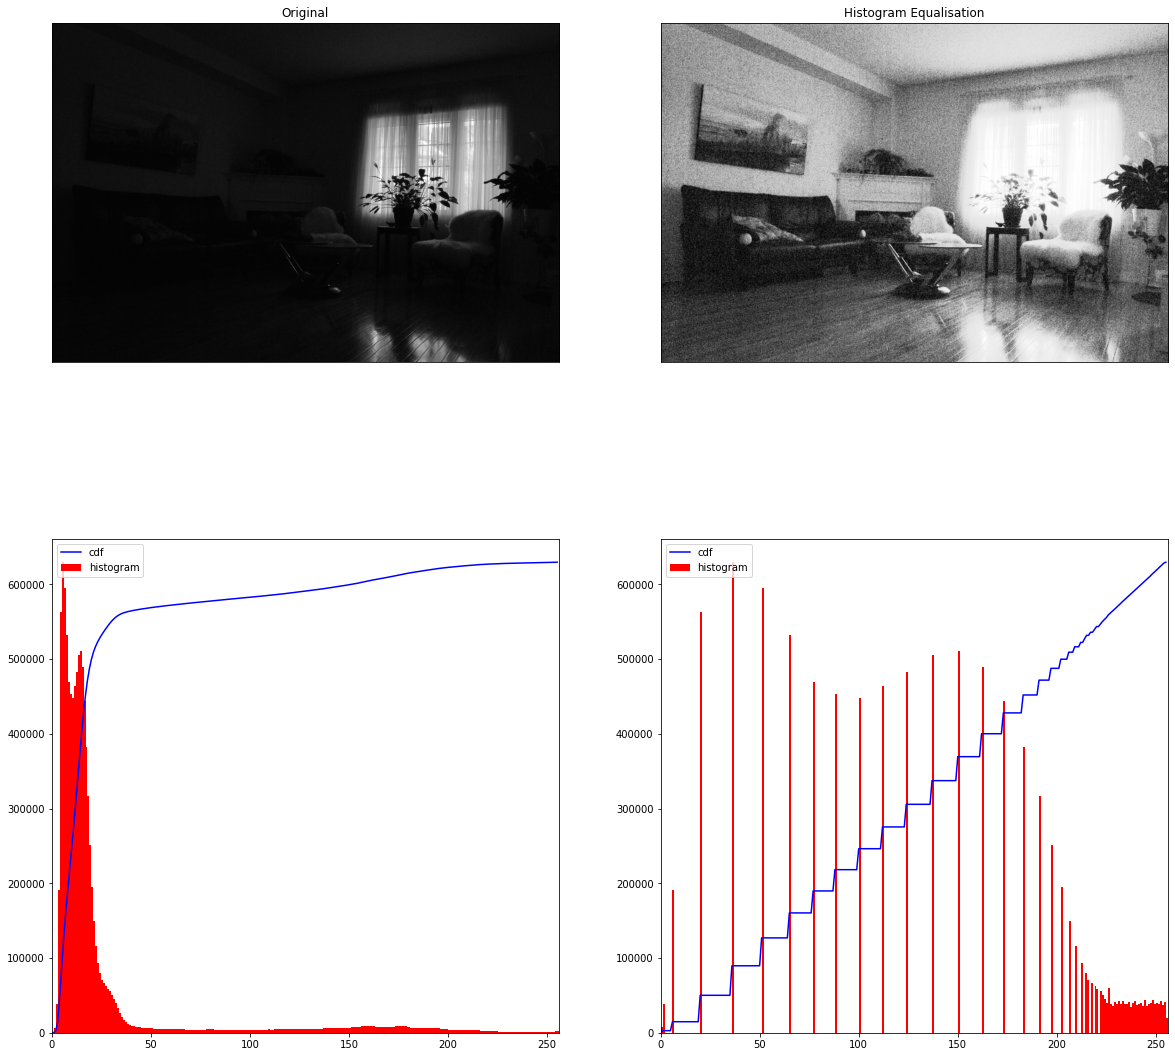

In [16]:
plt.subplot(221)
plt.imshow(src_img, cmap="gray")
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(dst, cmap="gray")
plt.title("Histogram Equalisation")
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.plot(src_cdf_normalized, color='b')
plt.hist(src_img.flatten(), 256, [0, 256], color='r')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0, 256])

plt.subplot(224)
plt.plot(dst_cdf_normalized, color='b')
plt.hist(dst.flatten(), 256, [0, 256], color='r')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0, 256])

plt.show()

In [34]:
bilateral_blur = cv2.bilateralFilter(dst, 31, 50, 50)

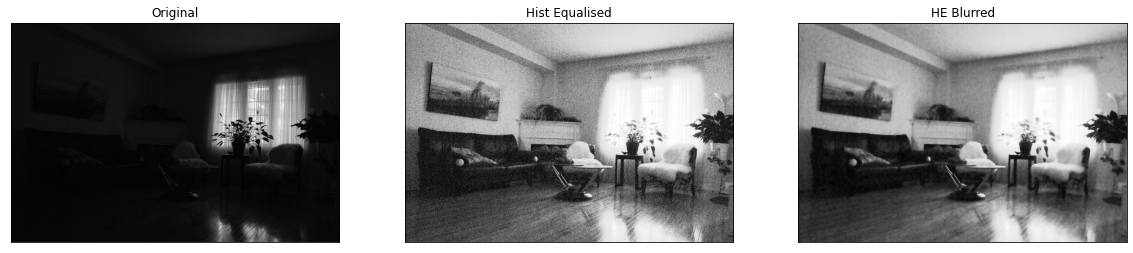

In [36]:
plt.subplot(131)
plt.imshow(src_img, cmap="gray")
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(dst, cmap="gray")
plt.title("Hist Equalised")
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(bilateral_blur, cmap="gray")
plt.title("HE Blurred")
plt.xticks([])
plt.yticks([])

plt.show()